In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_call_data = pd.read_csv('data/Train_call.txt', delimiter = '\t')
train_clinical_data = pd.read_csv('data/Train_clinical.txt', delimiter = '\t')
train_clinical_data
train_call_data
#train_clinical_data.T.describe()

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1,2927,43870,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1,85022,216735,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1,370546,372295,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1,471671,786483,5,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1,792533,907406,13,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,23,153062077,153452633,57,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2830,23,153466463,153491568,4,1,1,1,0,1,1,...,2,1,1,1,1,1,1,1,1,1
2831,23,153504394,153933426,55,1,1,1,0,1,1,...,2,1,1,1,1,1,1,1,1,1
2832,23,153938998,153989329,5,1,1,1,0,1,1,...,2,1,1,1,1,1,1,1,1,1


In [3]:
train_clinical_data

,Sample,Subgroup
0,Array.129,HER2+
1,Array.34,HR+
2,Array.67,HR+
3,Array.24,Triple Neg
4,Array.22,Triple Neg
...,...,...
95,Array.10,HER2+
96,Array.123,HR+
97,Array.100,HR+
98,Array.134,HR+


In [4]:
train_call_data['Chromosome'] = train_call_data['Chromosome'].apply(str)
count = 1
cur_chr = 0
for index, row in train_call_data.iterrows():
    if row[0] != cur_chr:
        cur_chr = row[0]
        count = 1
    train_call_data.at[index,'Chromosome'] =  str(row[0]) + "_%d" % count
    #train_call_data.at[index,'Chromosome'] =  str(row[0]) + "_%d_%d" % (count, row[3])
    count += 1
train_call_data

,Chromosome,Start,End,Nclone,Array.129,Array.34,Array.67,Array.24,Array.22,Array.36,...,Array.64,Array.89,Array.30,Array.35,Array.93,Array.10,Array.123,Array.100,Array.134,Array.130
0,1_1,2927,43870,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
1,1_2,85022,216735,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,-1,0
2,1_3,370546,372295,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,-1,0
3,1_4,471671,786483,5,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
4,1_5,792533,907406,13,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2829,23_70,153062077,153452633,57,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2830,23_71,153466463,153491568,4,1,1,1,0,1,1,...,2,1,1,1,1,1,1,1,1,1
2831,23_72,153504394,153933426,55,1,1,1,0,1,1,...,2,1,1,1,1,1,1,1,1,1
2832,23_73,153938998,153989329,5,1,1,1,0,1,1,...,2,1,1,1,1,1,1,1,1,1


        index  Subgroup
0         HR+        36
1  Triple Neg        32
2       HER2+        32


<AxesSubplot:xlabel='index', ylabel='Subgroup'>

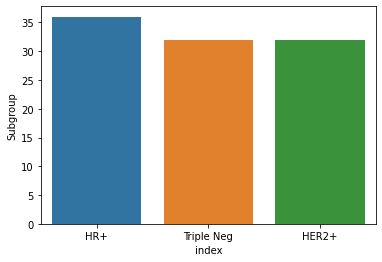

In [5]:
# Train_clinical file
xx = train_clinical_data['Subgroup'].value_counts().reset_index()
print(train_clinical_data['Subgroup'].value_counts().reset_index())
sns.barplot(x = 'index', y = 'Subgroup', data = xx)

In [6]:
# Transpose data
data_t = train_call_data.T
data_t.columns = data_t.iloc[0]
data_t = data_t.iloc[1:,:]
data_t

Chromosome,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,1_10,...,23_65,23_66,23_67,23_68,23_69,23_70,23_71,23_72,23_73,23_74
Start,2927,85022,370546,471671,792533,912799,1271190,1676445,1738295,2481927,...,151067607,152422390,152552851,152576854,152994680,153062077,153466463,153504394,153938998,153997146
End,43870,216735,372295,786483,907406,1266212,1590570,1703748,2477597,2562342,...,152416606,152548587,152570071,152935130,153054487,153452633,153491568,153933426,153989329,154492924
Nclone,3,4,4,5,13,96,45,4,104,14,...,159,20,6,64,5,57,4,55,5,43
Array.129,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,0,1,1,1,1,1
Array.34,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Array.10,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,1
Array.123,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.100,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
pd.DataFrame(data_t.count())

,0
Chromosome,
1_1,103
1_2,103
1_3,103
1_4,103
1_5,103
...,...
23_70,103
23_71,103
23_72,103


In [8]:
data_t.index.name = 'Sample'
merged_data = data_t.merge(train_clinical_data, how = 'inner', left_on = 'Sample', right_on = 'Sample')
merged_data

,Sample,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_8,1_9,...,23_66,23_67,23_68,23_69,23_70,23_71,23_72,23_73,23_74,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,HR+


In [9]:
merged_data.to_csv("newdata.csv")